In [ ]:
#comparing no shows to scholarship
import pandas as pd
import hvplot.pandas


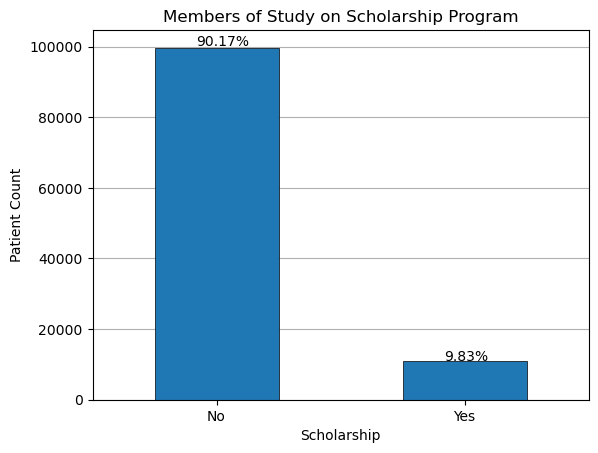

In [2]:
#plotting ratio of members of study that are part of scholarship program
df = pd.read_csv('data_cleaned.csv')
grouped_by_scholarship = df.groupby('Scholarship')
num_scholarship = df['Scholarship'].value_counts()
ax = num_scholarship.plot(kind = 'bar',
            xlabel = 'Scholarship',
            ylabel = 'Patient Count',
            title = 'Members of Study on Scholarship Program',
            edgecolor = 'black',
            linewidth = 0.5,
            rot = 0,
            )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xticklabels(['No','Yes'])


scholarship_percent = [round(100*num_scholarship[0] / len(df['Scholarship']),2),
                                                   round(100*num_scholarship[1] / len(df['Scholarship']),2)]
i=0
for p in ax.patches:
        ax.annotate(str(scholarship_percent[i]) + '%', (p.get_x() + p.get_width()/3, p.get_height() *1.005))
        i += 1


In [12]:
#calculate number of no shows by scholarship status
no_shows_by_scholarship = df.groupby('Scholarship')['No_Show'].value_counts()
no_shows_by_scholarship = no_shows_by_scholarship.reset_index()
no_shows_by_scholarship



,Scholarship,No_Show,count
0,0,No,79924
1,0,Yes,19741
2,1,No,8283
3,1,Yes,2578


In [13]:
#proportion of no shows by scholarship
no_shows_by_scholarship_merged = pd.merge(no_shows_by_scholarship, num_scholarship, how = 'left', on='Scholarship')
no_shows_by_scholarship_merged['Proportion'] = no_shows_by_scholarship_merged['count_x'] / no_shows_by_scholarship_merged['count_y']
no_shows_by_scholarship_merged.rename(columns={'count_x' : 'Count', 'count_y' : 'Total'},inplace=True)
no_shows_by_scholarship_merged

,Scholarship,No_Show,Count,Total,Proportion
0,0,No,79924,99665,0.801926
1,0,Yes,19741,99665,0.198074
2,1,No,8283,10861,0.762637
3,1,Yes,2578,10861,0.237363


AttributeError: Rectangle.set() got an unexpected keyword argument 'text'

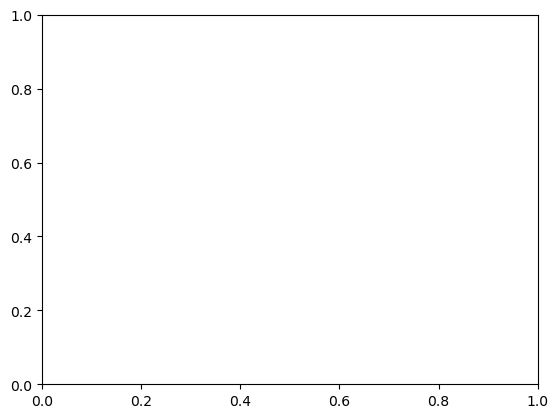

In [15]:
ax = no_shows_by_scholarship_merged[no_shows_by_scholarship_merged['No_Show']=='Yes'].plot(kind = 'bar',
                                                                                 x='Scholarship',
                                                                                 y='Proportion',
                                                                                 xlabel= 'Scholarship',
                                                                                 ylabel= 'Proportion',
                                                                                 title = 'Proportion of Patients Participating in Scholarship Program that No Shows',
                                                                                 edgecolor = 'black',
                                                                                 color = 'red',
                                                                                 rot= 0,       
                                                                                )
ax.set_xticklabels(['No','Yes'])